In [4]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #for reshaping graph size
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

url = "https://raw.githubusercontent.com/DanielCohen13/Fake_News/refs/heads/main/fake_news_dataset.csv"
fake_news_df = pd.read_csv(url)
fake_news_df

,id,title,author,text,state,date_published,source,category,sentiment_score,word_count,...,num_shares,num_comments,political_bias,fact_check_rating,is_satirical,trust_score,source_reputation,clickbait_score,plagiarism_score,label
0,1,Breaking News 1,Jane Smith,This is the content of article 1. It contains ...,Tennessee,30-11-2021,The Onion,Entertainment,-0.22,1302,...,47305,450,Center,FALSE,1,76,6,0.84,53.35,Fake
1,2,Breaking News 2,Emily Davis,This is the content of article 2. It contains ...,Wisconsin,02-09-2021,The Guardian,Technology,0.92,322,...,39804,530,Left,Mixed,1,1,5,0.85,28.28,Fake
2,3,Breaking News 3,John Doe,This is the content of article 3. It contains ...,Missouri,13-04-2021,New York Times,Sports,0.25,228,...,45860,763,Center,Mixed,0,57,1,0.72,0.38,Fake
3,4,Breaking News 4,Alex Johnson,This is the content of article 4. It contains ...,North Carolina,08-03-2020,CNN,Sports,0.94,155,...,34222,945,Center,TRUE,1,18,10,0.92,32.20,Fake
4,5,Breaking News 5,Emily Davis,This is the content of article 5. It contains ...,California,23-03-2022,Daily Mail,Technology,-0.01,962,...,35934,433,Right,Mixed,0,95,6,0.66,77.70,Real
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Breaking News 3996,John Doe,This is the content of article 3996. It contai...,Ohio,25-04-2020,InfoWars,Technology,0.91,1227,...,38880,697,Right,Mixed,0,29,10,0.22,95.46,Fake
3996,3997,Breaking News 3997,Alex Johnson,This is the content of article 3997. It contai...,Washington,09-01-2022,CNN,Sports,-0.57,1296,...,3650,925,Left,FALSE,1,53,3,0.42,16.54,Fake
3997,3998,Breaking News 3998,Alex Johnson,This is the content of article 3998. It contai...,California,03-03-2023,Breitbart,Entertainment,-0.17,522,...,35391,577,Left,FALSE,0,22,9,0.50,28.51,Fake
3998,3999,Breaking News 3999,John Doe,This is the content of article 3999. It contai...,Illinois,13-04-2021,New York Times,Health,-0.88,169,...,40424,201,Left,FALSE,1,3,6,0.17,71.16,Real


## Correlation

In [30]:
# Filtering

filtered_df = fake_news_df[['source', 'category', 'sentiment_score', 'word_count', 'char_count', 'has_images',
       'has_videos', 'readability_score', 'num_shares', 'num_comments',
       'political_bias', 'fact_check_rating', 'is_satirical', 'trust_score',
       'source_reputation', 'clickbait_score', 'plagiarism_score', 'label']]

In [2]:
# Trying OneHotEncoder

ohe = OneHotEncoder()
feature_arry = ohe.fit_transform(filtered_df[["political_bias", "fact_check_rating", "label"]]).toarray()
feature_labels = ohe.get_feature_names_out(["political_bias", "fact_check_rating", "label"])
features = pd.DataFrame(feature_arry, columns=feature_labels)

result_df = pd.concat([filtered_df, features], axis=1)
result_df

# Showing it with Heatmap (Need to learn how to show it on heatmap)

plt.figure(figsize=(17,2))
sns.heatmap(data=result_df ,cmap='coolwarm', annot=True)
plt.show()

NameError: name 'OneHotEncoder' is not defined

In [11]:
# Preparing the data (doesnt work)

# target_features = ['category', 'political_bias', 'trust_score']
# numeric_features = ['sentiment_score', 'word_count', 'char_count', 'has_images',
#        'has_videos', 'readability_score', 'num_shares', 'num_comments',
#        'is_satirical', 'trust_score', 'source_reputation', 'clickbait_score',
#        'plagiarism_score']
# categorical_features = ['source', 'category', 'fact_check_rating', 'political_bias', 'label']
# all_features = target_features + numeric_features + categorical_features

In [12]:
# Converting into Dummies

# fake_news_df_dum = pd.get_dummies(fake_news_df[all_features])
# fake_news_df_dum.columns

Index(['trust_score', 'sentiment_score', 'word_count', 'char_count',
       'has_images', 'has_videos', 'readability_score', 'num_shares',
       'num_comments', 'is_satirical', 'trust_score', 'source_reputation',
       'clickbait_score', 'plagiarism_score', 'category_Business',
       'category_Entertainment', 'category_Health', 'category_Politics',
       'category_Sports', 'category_Technology', 'political_bias_Center',
       'political_bias_Left', 'political_bias_Right', 'source_BBC',
       'source_Breitbart', 'source_CNN', 'source_Daily Mail',
       'source_Fox News', 'source_HuffPost', 'source_InfoWars',
       'source_New York Times', 'source_Reuters', 'source_Snopes',
       'source_The Guardian', 'source_The Onion', 'source_Washington Post',
       'category_Business', 'category_Entertainment', 'category_Health',
       'category_Politics', 'category_Sports', 'category_Technology',
       'fact_check_rating_FALSE', 'fact_check_rating_Mixed',
       'fact_check_rating_TRUE'

In [78]:
# Making a Correlation Matrix

# all_correlation_matrix = fake_news_df_dum.corr(numeric_only = False, method = 'spearman' ).round(2)
# subset_all_correlation_matrix = all_correlation_matrix[target_features].transpose()
# subset_all_correlation_matrix

In [80]:
# Trying w/o dummies

# target_features = ['category', 'political_bias', 'trust_score']
# numeric_features = ['sentiment_score', 'word_count', 'char_count', 'has_images',
#        'has_videos', 'readability_score', 'num_shares', 'num_comments',
#        'is_satirical', 'trust_score', 'source_reputation', 'clickbait_score',
#        'plagiarism_score']

# fake_news_df_num = fake_news_df[numeric_features + target_features]

# correlation_matrix = fake_news_df_num.corr(numeric_only = True, method = 'spearman' ).round(2)

# subset_correlation_matrix = correlation_matrix[target_features].transpose()

<Axes: >

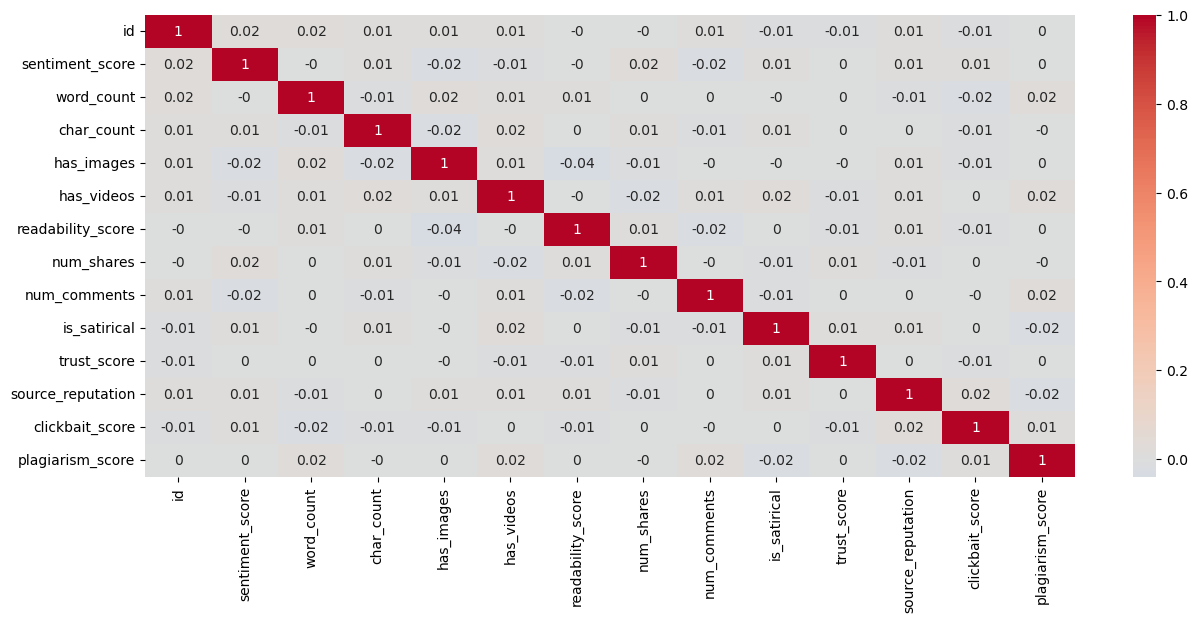

In [49]:
# Correlation with numeric columns

corrs = fake_news_df.corr(method = 'kendall', numeric_only=True).round(2)
plt.figure(figsize=(15,6))
sns.heatmap(corrs, cmap='coolwarm', center=0, annot=True)

## Date Time

In [23]:
# date-time

fake_news_df["date_published"] = pd.to_datetime(fake_news_df.date_published)
fake_news_df["date_published"]

0      2021-11-30
1      2021-09-02
2      2021-04-13
3      2020-03-08
4      2022-03-23
          ...    
3995   2020-04-25
3996   2022-01-09
3997   2023-03-03
3998   2021-04-13
3999   2023-12-20
Name: date_published, Length: 4000, dtype: datetime64[ns]

## Data Understanding

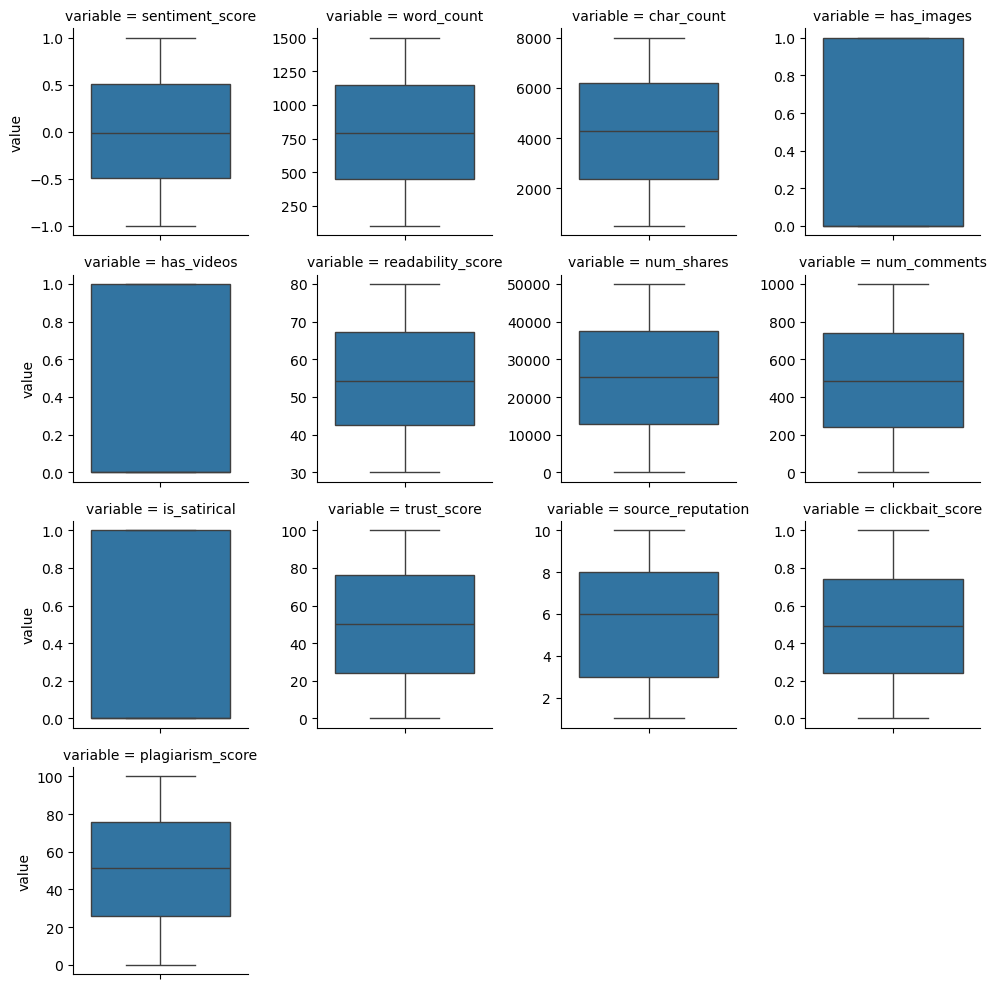

In [17]:
features = fake_news_df.select_dtypes(include='number').columns
melted_fake_news_df = pd.melt(fake_news_df, id_vars='id', value_vars=features.drop('id'))
g = sns.FacetGrid(data = melted_fake_news_df, col="variable", col_wrap=4, height=2.5, sharey = False)
g.map_dataframe(sns.boxplot, y = 'value')
plt.show()

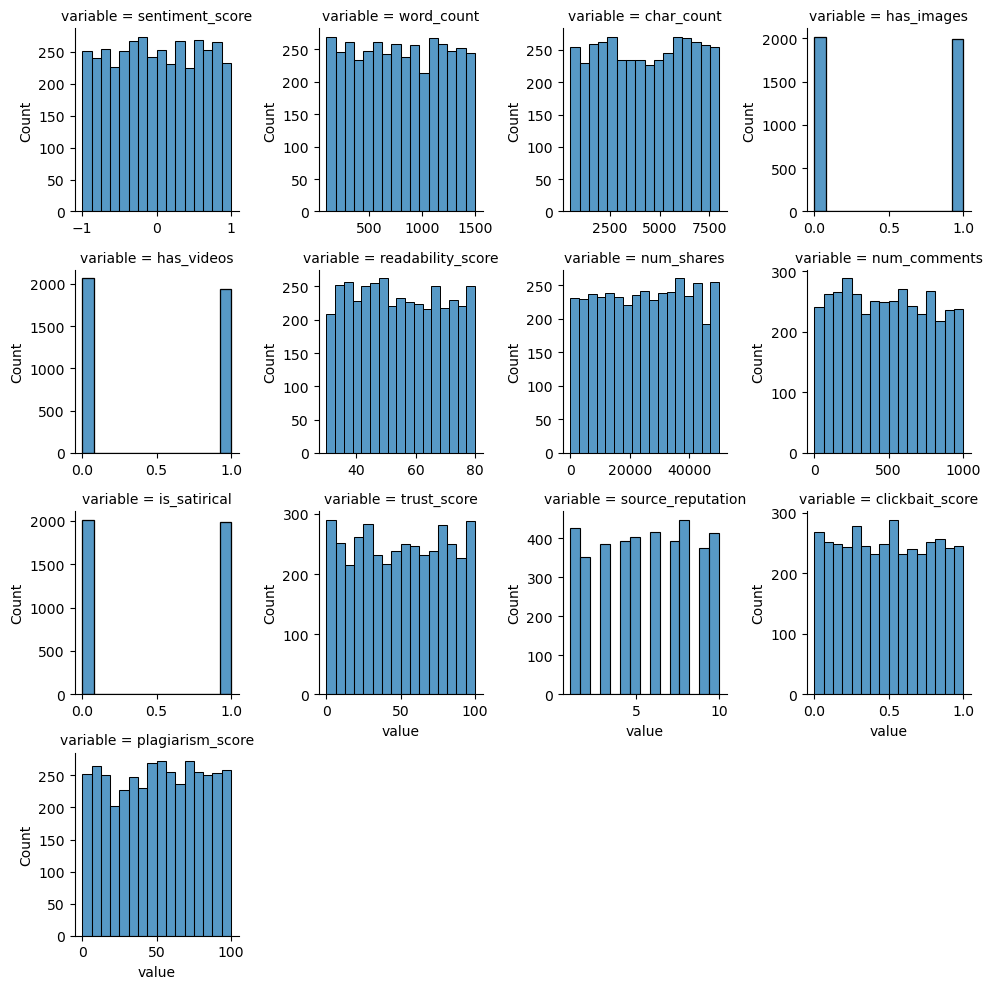

In [21]:
g = sns.FacetGrid(data = melted_fake_news_df, col="variable", col_wrap=4, height=2.5, sharey = False, sharex = False)
g.map_dataframe(sns.histplot, x = 'value')
plt.show()

In [28]:
# Checking which columns are categorial

non_numeric_columns = fake_news_df.select_dtypes(include='object')
non_numeric_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              4000 non-null   object
 1   author             4000 non-null   object
 2   text               4000 non-null   object
 3   state              4000 non-null   object
 4   date_published     4000 non-null   object
 5   source             4000 non-null   object
 6   category           4000 non-null   object
 7   political_bias     4000 non-null   object
 8   fact_check_rating  4000 non-null   object
 9   label              4000 non-null   object
dtypes: object(10)
memory usage: 312.6+ KB


## Data Preperation

In [45]:
fake_news_df.isnull().sum().sort_values(ascending = False)

id                   0
title                0
plagiarism_score     0
clickbait_score      0
source_reputation    0
trust_score          0
is_satirical         0
fact_check_rating    0
political_bias       0
num_comments         0
num_shares           0
readability_score    0
has_videos           0
has_images           0
char_count           0
word_count           0
sentiment_score      0
category             0
source               0
date_published       0
state                0
text                 0
author               0
label                0
dtype: int64